# Machine Learning with Regression in Python

[Explore Data](#Explore-Data)  
[Normalize data](#Normalize-data)  
[Linear Regression](#Linear-Regression)  
[Ridge](#Ridge)  
[Lasso](#Lasso)  
[Random Forest](#Random-Forest)  
[Boosted Trees](#Boosted-Trees)  
[Neural Network](#Neural-Network)  
[Make Final Predictions](#Make-Final-Predictions)  

### Business Problem
1. We work for a fast-food restaurant that is looking to expand its business to new areas.
2. We have county-wide data including information on houses, incomes, population, crime, zoning information, and more for over 7,000 counties in which our business is currently operating, all stored in the csv file "existing.csv".
3. For each of these counties, we have averaged our sales revenue over the course of the past several months and we will use this data to train a regression model.
4. Using that trained regression model, we will predict what sales will be on a dataset of over 21,000 counties in which we do not have any facilities. This information is stored in "new.csv".
5. **The question our manager wants to answer is which county should we expand our business into next? Where can we expect the most sales revenue?**

In [1]:
# dataframe libs
import pandas as pd
import numpy as np

# plotting libs
import matplotlib.pyplot as plt
import seaborn as sns

# status bar lib
import tqdm

C:\Users\uger7\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# turn off a warning that makes processing quicker
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

## Explore Data 

[Back to top](#Machine-Learning-with-Regression-in-Python)  

**Section Goals**
1. Read data with pandas
1. Check data for missing values
2. Explore variable types
2. Determine the dependent variable
2. Determine best predictors
3. Determine best linear transformations for modeling
4. Determine if any interactions make sense

Sometimes, feature engineering (steps 4-7) can be the longest part of the machine learning process. The process here is truncated to save time.

In [3]:
# read data
data = pd.read_csv('existing.csv')

### DATA DICTIONARY
- crim: per capita crime rate by town
- zn: proportion of residential land zoned for lots over 25,000 sq.ft.
- indus: proportion of non-retail business acres per town.
- rm: average number of rooms per dwelling
- age: proportion of owner-occupied units built prior to 1940
- tax: full-value property-tax rate per 10,000 dollars
- ptratio: pupil/teacher ratio by town
- black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- median_home_value: median value of owner-occupied homes
- sales: the average sales by month in the given county
- county_id: the unique identifier of the county in which the store is operating

In [4]:
# data shape (rows, columns)
data.shape

(7432, 14)

In [5]:
# view first five rows of dataset
data.head()

,crim,zn,indus,rm,age,tax,ptratio,black,population,families,median_home_value,median_income,sales,county_id
0,0.126850,0.000000,10.052747,6.605513,83.852872,398.095958,19.921367,399.247329,2174,531,197115,43691,45525.72,29273
1,6.948668,2.575345,13.587802,6.058499,71.853423,489.455895,18.410891,329.575330,1632,415,208099,52122,40847.65,20333
2,1.106052,19.060291,14.479209,8.135461,74.923176,341.988287,14.547811,422.322861,432,97,496293,116827,29130.24,20337
3,0.228808,5.074005,5.946199,6.379816,75.332827,301.541124,16.145675,391.121575,2341,602,241825,58209,41263.08,8035
4,2.365234,7.291047,13.035502,5.989832,46.900638,403.151512,18.837390,363.936595,3610,966,214144,47867,45233.83,24593


The first thing we notice is that we have an indicator about the proportion of blacks in each county. There are non-discrimination laws, so part of our responsibility as analysts is to not let racial information play into our decision-making. Therefore, we should omit this variable.

In [6]:
# check for missing values
data.isnull().sum()

crim                 0
zn                   0
indus                0
rm                   0
age                  0
tax                  0
ptratio              0
black                0
population           0
families             0
median_home_value    0
median_income        0
sales                0
county_id            0
dtype: int64

The fact that we have all 0s means there is no missing data. Cleaning data is an important part of machine learning but will not be covered here.

In [7]:
# view how pandas is reading each column's data type
data.dtypes

crim                 float64
zn                   float64
indus                float64
rm                   float64
age                  float64
tax                  float64
ptratio              float64
black                float64
population             int64
families               int64
median_home_value      int64
median_income          int64
sales                float64
county_id              int64
dtype: object

In [8]:
# summary of the metadata
data.describe()

,crim,zn,indus,rm,age,tax,ptratio,black,population,families,median_home_value,median_income,sales,county_id
count,7432.000000,7432.000000,7432.000000,7432.000000,7432.000000,7432.000000,7432.000000,7432.000000,7432.000000,7432.000000,7432.000000,7432.000000,7432.000000,7432.000000
mean,3.772483,11.129333,11.065441,6.297828,70.377116,404.052943,18.396581,356.185581,3068.596878,791.905409,227688.736545,58312.731701,42158.730592,14780.409849
std,7.779593,16.860145,5.926543,0.744132,22.334313,141.664945,2.164231,73.847485,7523.174688,1976.069391,92545.905262,28385.727083,4248.066902,8380.588813
min,0.011021,0.000000,1.062038,3.503176,6.679494,151.018897,10.837617,2.754032,99.000000,24.000000,50285.000000,9513.000000,28600.180000,111.000000
25%,0.158442,0.000000,5.812698,5.823247,52.478288,292.427391,16.969242,346.373838,671.750000,171.000000,173162.000000,38379.500000,40050.500000,7542.250000
50%,0.750497,2.264277,10.251853,6.208356,74.060175,354.031377,18.620381,379.519848,1339.000000,341.000000,211357.500000,52739.500000,42607.740000,14755.500000
75%,4.283231,18.200273,16.578773,6.700987,89.126271,507.909445,19.972947,396.408006,2599.000000,656.250000,260454.000000,71103.750000,44932.460000,22093.750000
max,80.091252,98.649315,32.914894,10.463792,122.863357,868.278654,26.042857,509.940068,81998.000000,19765.000000,605425.000000,202291.000000,58175.680000,29299.000000


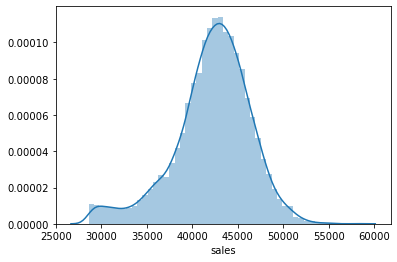

In [9]:
sns.distplot(data['sales'])

The sales variable is basically normally distributed, but its left tail seems to exhibit a hith. We will try making predictions with several techniques to see which one(s) deals best with the non-normality in the distribution. The predicted variable (otherwise known as the dependent variable) will not always be normally distributed, but when it is, it is easier to model usually. How easy it is to model also depends on the quality of the inputs.

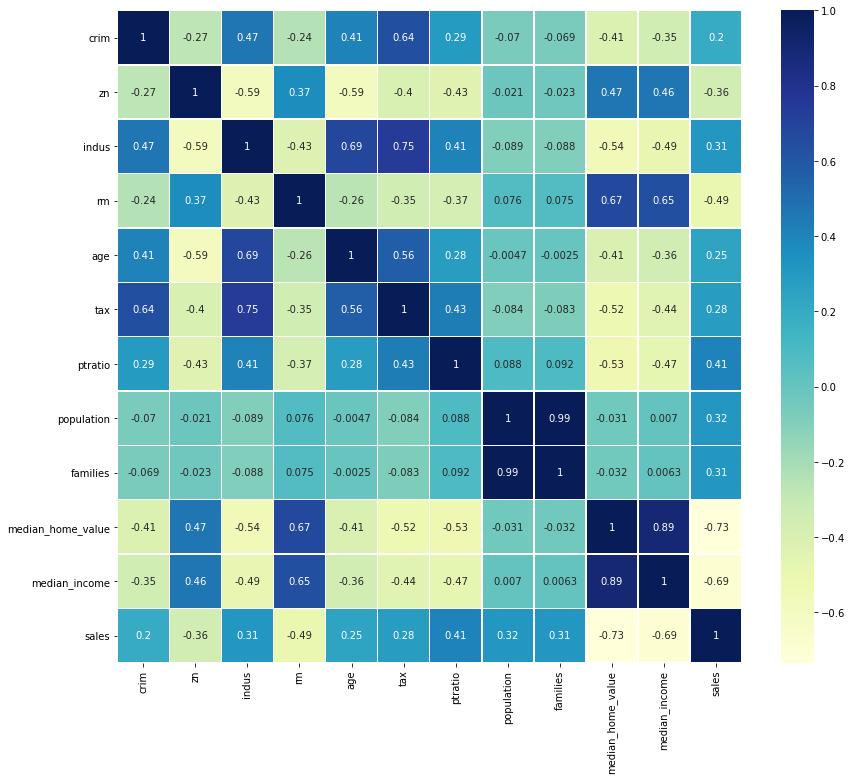

In [10]:
# view correlation coefficients from each column with one another
# omit some of the variables we already know we won't use
corrMatrix = data[['crim','zn','indus','rm','age','tax','ptratio','population','families','median_home_value','median_income','sales']].corr()

plt.rcParams["figure.figsize"] = (14,12)
sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu", linewidths=.5)
plt.show()

Some interesting observations:
1. families and population are very highly correlated. Because population is slightly more highly correlated with sales, we will keep that variable and omit families. We don't want variables that are that highly correlated with one another because it can confuse our predictions.
2. median_home_value and median_income are also highly correlated, but not as much. We could justify dropping one of these as well, but we have enough data to keep both of them.
3. median_home_value and median_income are both highly negatively correlated with sales. The data suggests that our business does not do as well in high-income areas. There could be opportunities to make more high-end products in those areas to see if some of that can be mitigated.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000214716D4948>,
      dtype=object)

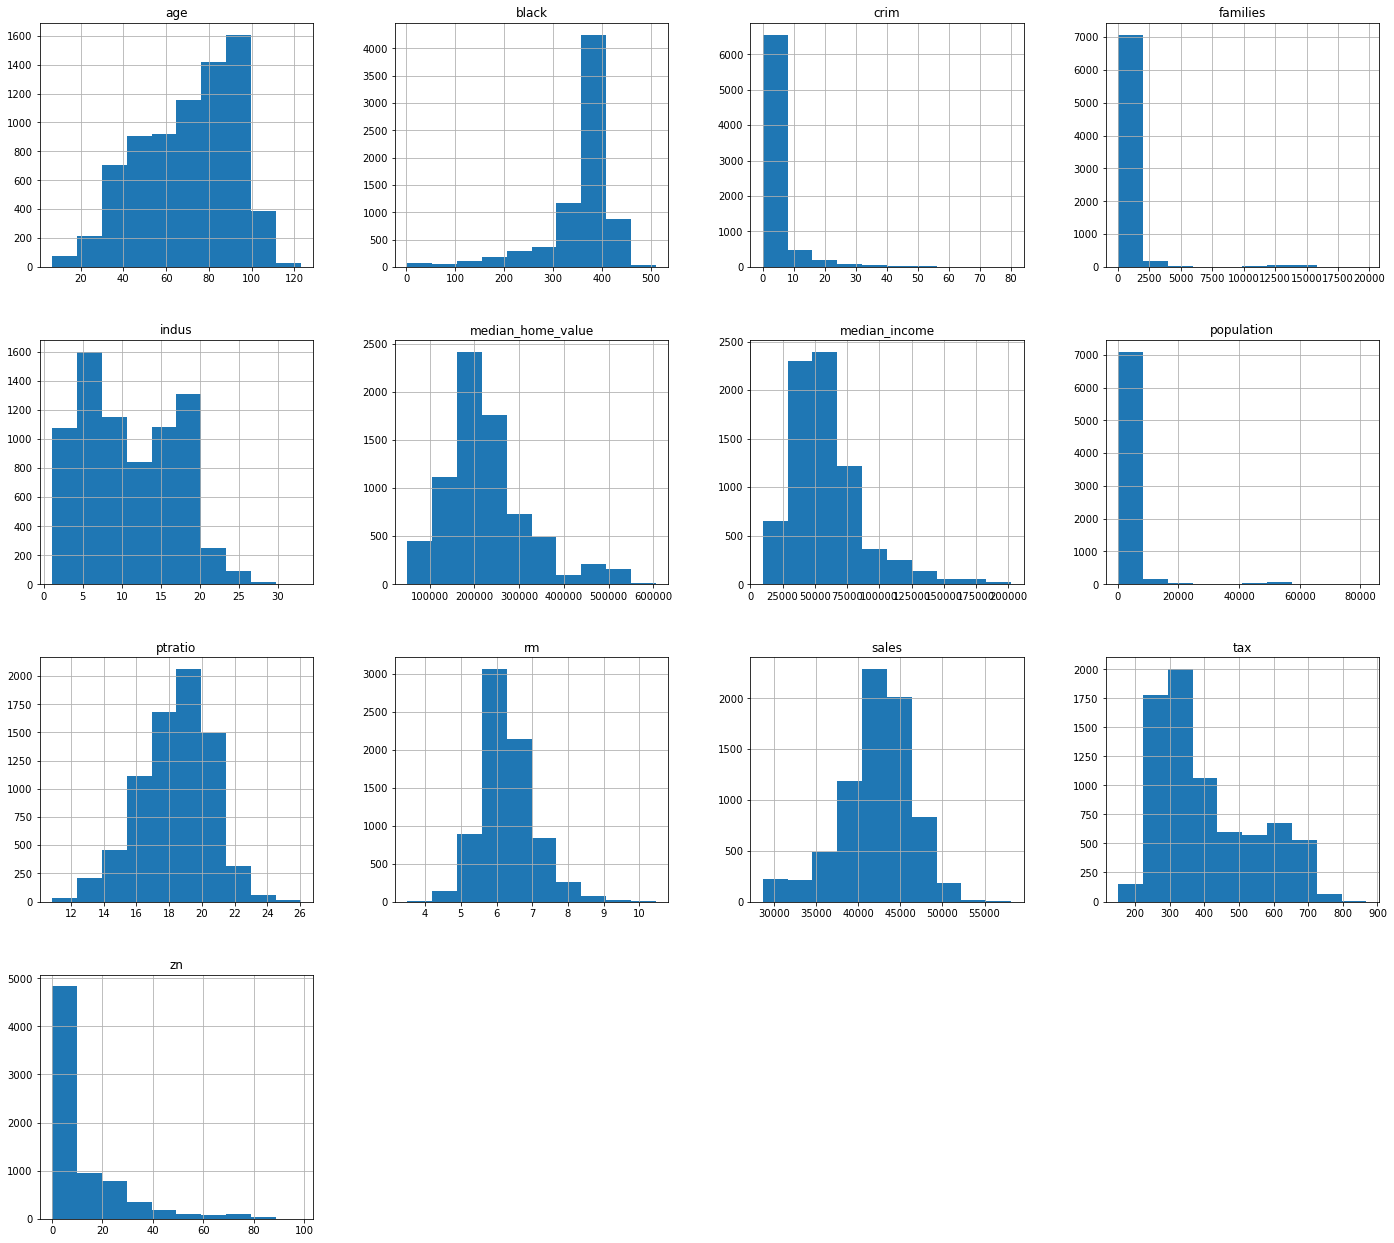

In [11]:
# view distributions of variables
plt.rcParams["figure.figsize"] = (24,22)
data.drop(columns='county_id').hist()

Some interesting observations:
1. The distribution of population is highly skewed right. To normalize highly skewed-right variables, we can perform tranformations. In the case of population, taking the natural log will help normalize this distribution and make it easier to model.
3. We may want to try the same for zn but crim to see if it materially affects the models, but we have to also be careful to not perform logorithmic applicaitons on variables that could have 0 as a possible value. Normalizing all variables is not critical but we should at least consider such transformations, especially for variables that we think could be highly correlated to the dependent variable.
4. With median_home_value, we can theorize a kind of non-linear relationship between it and sales, and adding a quadratic term could account for that non-linearity.
5. median_income is slightly skewed right. Instead of using a logarithmic transformation since it's not as highly skewed as population, we can take its square root to make it slightly more normal.
6. There are several other transformations we could try applying, such as creating binary 0/1 variables (sometimes called dummy variables) and creating interactions (multiplying two variables together).

In [12]:
# a basic data pipeline for processing new data to make predictions on, based on decisions made from our data exploration
# there are more sophisticated ways to do this, but our data is pretty clean so this basic function is fine
def pipe(df):
    data = df.copy()
    data['log_population'] = np.log(data['population']) # to normalize population's distribution
    data['median_home_value_sq'] = data['median_home_value']**2 # to account for diminishing returns in home value
    data['median_income_sqrt'] = np.sqrt(data['median_income']) # to normalize the distribution
    return data.drop(columns=['population','median_income','black','families','county_id'])

data = pipe(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002146EEBE348>,
      dtype=object)

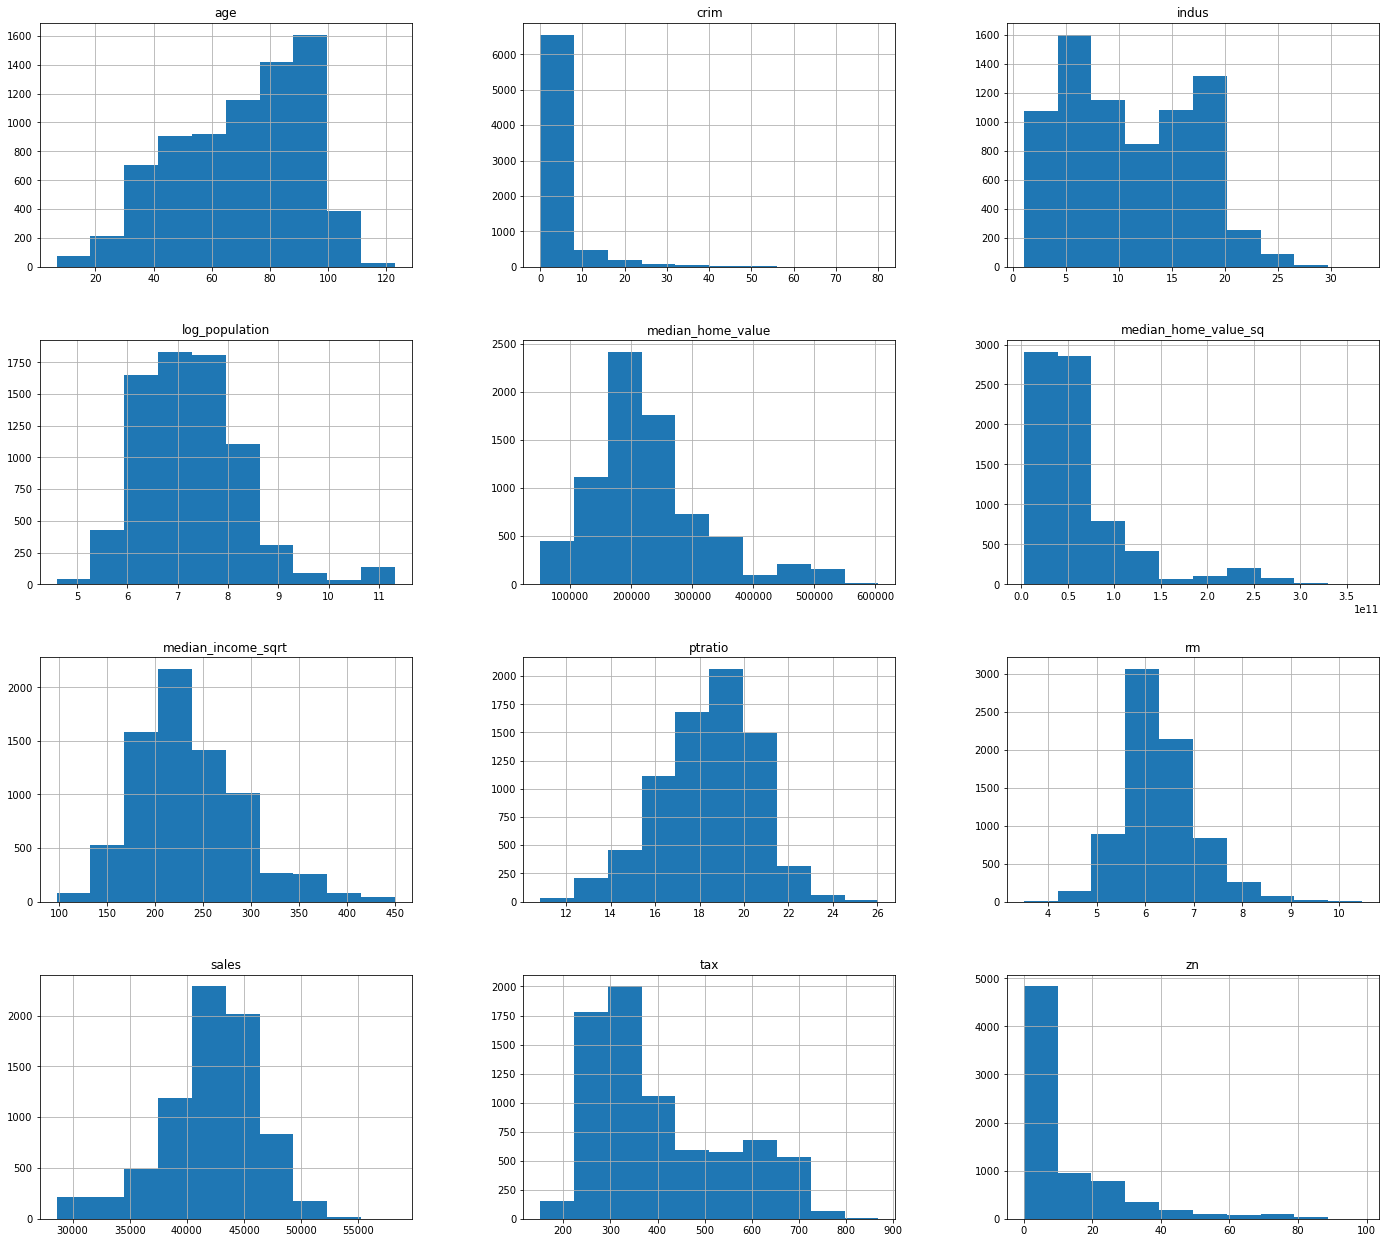

In [13]:
# view distributions of variables after transformations
plt.rcParams["figure.figsize"] = (24,22)
data.hist()

In [14]:
# view processed dataset
data.head()

,crim,zn,indus,rm,age,tax,ptratio,median_home_value,sales,log_population,median_home_value_sq,median_income_sqrt
0,0.126850,0.000000,10.052747,6.605513,83.852872,398.095958,19.921367,197115,45525.72,7.684324,38854323225,209.023922
1,6.948668,2.575345,13.587802,6.058499,71.853423,489.455895,18.410891,208099,40847.65,7.397562,43305193801,228.302431
2,1.106052,19.060291,14.479209,8.135461,74.923176,341.988287,14.547811,496293,29130.24,6.068426,246306741849,341.799649
3,0.228808,5.074005,5.946199,6.379816,75.332827,301.541124,16.145675,241825,41263.08,7.758333,58479330625,241.265414
4,2.365234,7.291047,13.035502,5.989832,46.900638,403.151512,18.837390,214144,45233.83,8.191463,45857652736,218.785283


## Split Data
**Section Goals**
1. Create a random split in dataset
2. Set random seed for repeatability

In [15]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != 'sales']
y = data.loc[:, data.columns == 'sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=20)

## Explore Data Relationships with Linear Regression
**Section Goals**
1. Create a multivariate linear model of sales
2. Interpret estimated coefficients magnitude, direction
3. Determine which variables are statistically significant in our model

Since this is the simplest model we will run, it is also the easiest to interpret. Many times, we make a linear model and call it the model to beat. Our goal will be to use more sophisticated techniques to outclass the simple model.

In [16]:
import statsmodels.api as sm

X_train['intercept'] = 1
lm = sm.OLS(y_train,X_train)
lr_results = lm.fit()
lr_results.summary()

C:\Users\uger7\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1415.
Date:                Sun, 09 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:13:41   Log-Likelihood:                -50760.
No. Observations:                5574   AIC:                         1.015e+05
Df Residuals:                    5562   BIC:                         1.016e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
crim                    -7.0494      5.192     -1.358      0.175     -17.228       3.130
zn                       2.6530      2.437      1.088      0.276      -2.125       7.431
indus                   -1.3673      9.360     -0.146      0.884     -19.716      16.982
rm                    -188.8221     54.407     -3.471      0.001    -295.482     -82.162
age                      5.5631      2.030      2.740      0.006       1.583       9.543
tax                     -1.4438      0.379     -3.807      0.000      -2.187      -0.700
ptratio                 28.7541     17.162      1.675      0.094      -4.890      62.398
median_home_value       -0.0118      0.002     -5.384      0.000      -0.016      -0.007
log_population        1705.3080     29.606     57.601      0.000    1647.269    1763.347
median_home_value_sq  -2.45e-08   3.22e-09     -7.618      0.000   -3.08e-08   -1.82e-08
median_income_sqrt     -13.1787      1.227    -10.739      0.000     -15.585     -10.773
intercept             3.787e+04    642.578     58.941      0.000    3.66e+04    3.91e+04
==============================================================================
Omnibus:                       32.561   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.610
Skew:                           0.157   Prob(JB):                     3.05e-08
Kurtosis:                       3.223   Cond. No.                     1.77e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**How to interpret output:**
1. An estimated coefficeint value (found in the "coef" column) answers this question: Given a one-unit change in the variable's value, how do we expect the depdendent variable to change in response, holding all other factors constant?
  - For example, looking at the estimated coefficient for age, we expect a one unit change in its value to account for about 5.60 extra in sales per month, all else held equal.
2. For logged variables, we say a one percent change in the value of the independent variable changes the value of the dependent variable by the amount of the estimated coefficient.
  - For example, as population increases by one percent, we expect sales to incrase by about 1,700, all else held equal
3. Statistical significance can be read from the estiamted coeffiecnet's p-value (the column labled "P>|t|")
4. All p-values less than 0.05 denote that a given variable is significant at the 95% confidence level--we are 95% confident that the variable has some influence on the predicted outcome, or at the very least, the two variables move together, all else held constant.
5. A p-value less than 0.01 is siginficant at the 99% level, less than 0.1 at the 90% level, and so forth.
6. The significant variables in this model (at the 95% confidence level) are rm, age, tax, median_home_value, log_population, median_home_value_sq, median_income_sqrt, and the intercept.
7. The intercept is what we expect the dependent variable's value to be if all independent variables in the model are 0--the intercept doesn't always have a meaningful value and is usually only present to make the model fit better.
7. Just because a variable is statistically insignificant does not mean we want to drop it. Statistically insignificant variables can still have some effect on the outcome even if we don't have enough evidence to prove it. Choosing features to include in a model is an iterative and oftentimes long process.

## Normalize data
[Back to top](#Machine-Learning-with-Regression-in-Python)  

**Section Goals**
1. Normalize all x variables so that new_value_i = (old_value_i - mean(old_value))/std(old_value)
    - This functionally means that each value will have mean of 0 and its unit will be in terms of standard deviations from its true mean
    - Not necessary for every modeling application, but can improve performance and make visualizations easier-to-understand

In [17]:
# we need to drop the intercept variable we created for the sm model since sklearn adds it automatically
X_train.drop(columns='intercept',inplace=True)

C:\Users\uger7\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
from sklearn.preprocessing import StandardScaler

# normalize traning set
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# normalize test set
scaler.fit(X_test)
X_test = scaler.transform(X_test)

# X_train and X_test are now numpy ndarray objects. X is still a pandas dataframe

## Linear Regression
[Back to top](#Machine-Learning-with-Regression-in-Python)  

This is our simplest technique. This can be considered the model to beat for all other subsequent, more complicated modeling applications. 

**Section Goals**
1. Train the linear model already created with sm lib using scikit-learn on normalized dataset
2. Make predctions on test dataset
3. Calculate an error metric (root mean square error) and an accuracy metric (R-squared)
4. Create visualizations of predictions and residuals
5. Create coefficient plot

In [19]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression(fit_intercept=True)

In [20]:
# train the model
LinReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# make predictions on test dataset
pred = LinReg.predict(X_test)
pred = [p[0] for p in pred]

In [22]:
# calculate an accuracy metric and an error metric
from sklearn.metrics import mean_squared_error

test_set_rsq = LinReg.score(X_test,y_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test,pred)))

In [23]:
print('Test Set RSQ value with Linear Regression:',test_set_rsq)
print('Test Set RMSE with Linear Regression:',test_set_rmse)
print('Actual Dep Var Standard Dev:',y_test['sales'].std())

Test Set RSQ value with Linear Regression: 0.7288433279273054
Test Set RMSE with Linear Regression: 2207.5116716287707
Actual Dep Var Standard Dev: 4240.428686608282


RSQ, sometimes called "coefficient of determination," is a calculation used to determine what percentage of the variance in the dependent variable can be explained in the model. In this case, about 73% of the variance in sales is explained in the linear model through the inputs. This can be good or bad--it depends on how well you intuitively expect your model to do and how well you could do without a model.

RMSE means "root mean squared error" and is a measure of the average distance that predictions are away from the actual values. Comparing it to the depdendent variable's standard deviation is a good way to get a sense of scale and determine if the RMSE value is good or bad. In this case, it is about half the standard deviation value, which is pretty good.

In [24]:
# store results to view later
all_model_accuracy_error_metrics = pd.DataFrame(columns = ['model','rsq','rmse'])

def add_new_model_metrics(model_name,rsq,rmse):
    global all_model_accuracy_error_metrics
    all_model_accuracy_error_metrics = all_model_accuracy_error_metrics.append({
        'model':model_name,
        'rsq':np.round(rsq,4),
        'rmse':np.round(rmse,2)
    },ignore_index=True)

add_new_model_metrics('Linear',test_set_rsq,test_set_rmse)

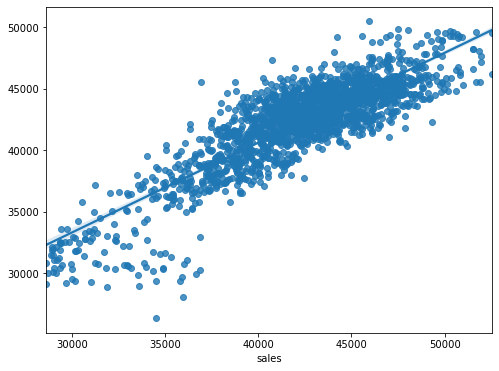

In [25]:
# how well do our predictions look against the actual values?
plt.rcParams["figure.figsize"] = (8,6)
sns.regplot(x=y_test['sales'],y=pred)

Text(0.5, 1.0, 'Residual plot')

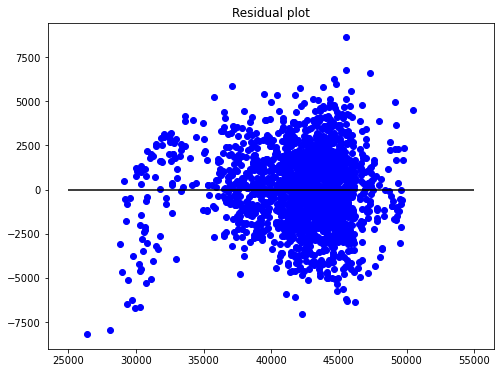

In [26]:
# residual plot - how randomly dispersed are our errors?
xmin = 25000; xmax = 55000
x_plot = plt.scatter(pred, (pred - y_test['sales']), c='b')
plt.hlines(y=0, xmin=xmin, xmax=xmax)
plt.title('Residual plot')

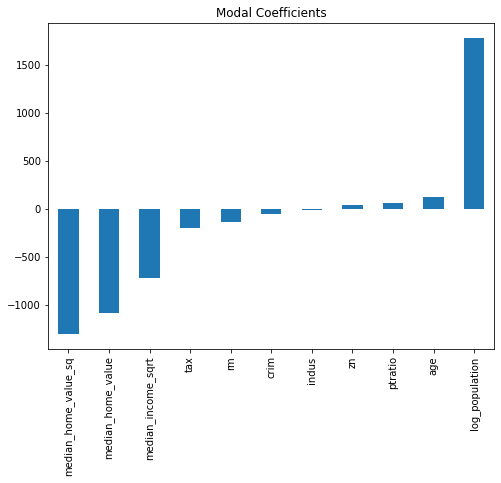

In [27]:
# coefficient plot
predictors = X.columns
coef = pd.Series(LinReg.coef_[0],predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

## Ridge
[Back to top](#Machine-Learning-with-Regression-in-Python)  

**Section Goals**
1. Find optimal alpha value using 5-fold corss-validation
    - alpha is the hyperparemeter within a Ridge regression that normalizes the estimated coefficient
    - it is a way to regularize the model so that it makes better predictions -- it also penalizes overfitting
    - the higher the alpha value, the lower the smaller the magnitude of the regularized coefficient values
1. Train a ridge regression using optimal alpha value
2. Make predctions on test dataset
3. Calculate root mean square error and R-squared
4. Create visualizations of predictions and residuals
5. Create coefficient plot

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# loop through 100 alpha values
metrics = {}
for i in tqdm.tqdm(range(1,101)):
    RidgeReg = Ridge(alpha=10/i)
    rsq = cross_val_score(RidgeReg,X_train,y_train,cv=5)
    metrics[10/i] = rsq.mean()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 16.10it/s]


In [29]:
optimal_alpha = max(metrics, key=metrics.get)
print(optimal_alpha)

10.0


In [30]:
# specify model with optimal alpha value
RidgeReg = Ridge(alpha=optimal_alpha)

In [31]:
# train model
RidgeReg.fit(X_train,y_train)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [32]:
# make predictions
pred = RidgeReg.predict(X_test)
pred = [p[0] for p in pred]

In [33]:
# calculate an accuracy metric and an error metric
test_set_rsq = RidgeReg.score(X_test,y_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test,pred)))

print('Test Set RSQ value with Ridge:',test_set_rsq)
print('Test Set RMSE with Ridge:',test_set_rmse)
print('Actual Dep Var Standard Dev:',y_test['sales'].std())

Test Set RSQ value with Ridge: 0.7288691473461095
Test Set RMSE with Ridge: 2207.4065699825655
Actual Dep Var Standard Dev: 4240.428686608282


In [34]:
# store results to view later
add_new_model_metrics('Ridge',test_set_rsq,test_set_rmse)

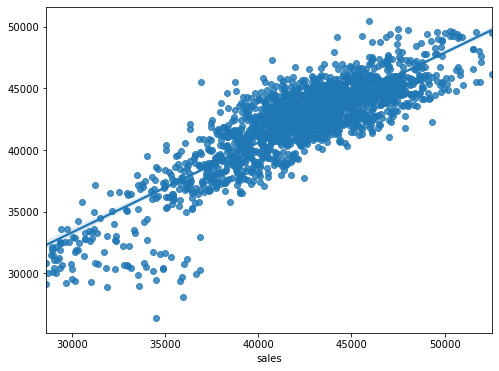

In [35]:
# how well do our predictions look against the actual values?
sns.regplot(x=y_test['sales'],y=pred)

Text(0.5, 1.0, 'Residual plot')

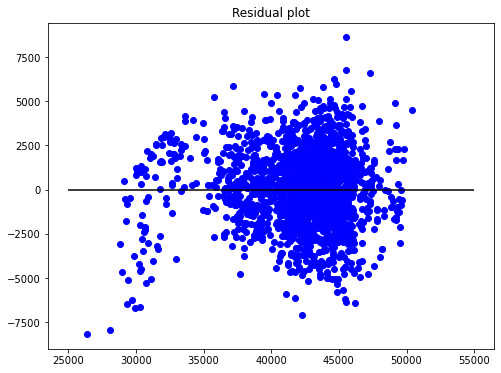

In [36]:
# residual plot - how randomly dispersed are our errors?
x_plot = plt.scatter(pred, (pred - y_test['sales']), c='b')
plt.hlines(y=0, xmin=xmin, xmax=xmax)
plt.title('Residual plot')

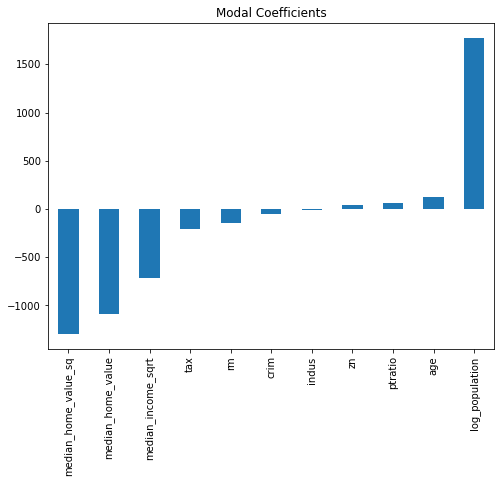

In [37]:
# ridge coefficient plot
predictors = X.columns
coef = pd.Series(RidgeReg.coef_[0],predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

## Lasso
[Back to top](#Machine-Learning-with-Regression-in-Python)  

**Section Goals**
1. Find optimal alpha value using 5-fold corss-validation
1. Train a lasso regression using optimal alpha value
2. Make predctions on test dataset
3. Calculate root mean square error and R-squared
4. Create visualizations of predictions and residuals
5. Create coefficient plot

In [38]:
from sklearn.linear_model import Lasso

# loop through 100 alpha values
metrics = {}
for i in tqdm.tqdm(range(1,101)):
    LassoReg = Lasso(alpha=10/i)
    rsq = cross_val_score(LassoReg,X_train,y_train,cv=5)
    metrics[10/i] = rsq.mean()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.49it/s]


In [39]:
# access the best-performing alpha value
optimal_alpha = max(metrics, key=metrics.get)
print(optimal_alpha)

10.0


In [40]:
# specify model with optimal alpha value
LassoReg = Lasso(alpha=optimal_alpha)

In [41]:
# train model
LassoReg.fit(X_train,y_train)

Lasso(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
# make predictions
pred = LassoReg.predict(X_test)

In [43]:
# calculate an accuracy metric and an error metric
test_set_rsq = LassoReg.score(X_test,y_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test,pred)))

print('Test Set RSQ value with Lasso:',test_set_rsq)
print('Test Set RMSE with Lasso:',test_set_rmse)
print('Actual Dep Var Standard Dev:',y_test['sales'].std())

Test Set RSQ value with Lasso: 0.7293669877019806
Test Set RMSE with Lasso: 2205.379060052197
Actual Dep Var Standard Dev: 4240.428686608282


In [44]:
# store results to view later
add_new_model_metrics('Lasso',test_set_rsq,test_set_rmse)

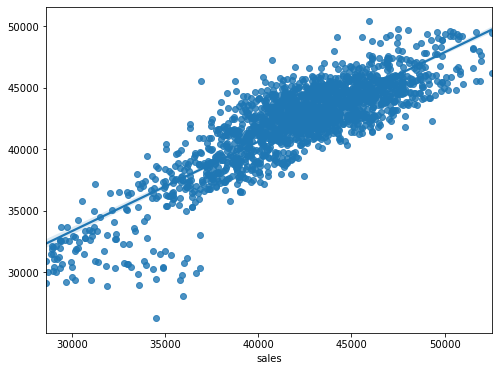

In [45]:
# how well do our predictions look against the actual values?
sns.regplot(x=y_test['sales'],y=pred)

Text(0.5, 1.0, 'Residual plot')

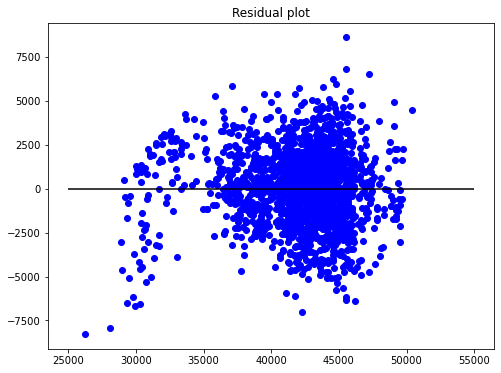

In [46]:
# residual plot - how randomly dispersed are our errors?
x_plot = plt.scatter(pred, (pred - y_test['sales']), c='b')
plt.hlines(y=0, xmin=xmin, xmax=xmax)
plt.title('Residual plot')

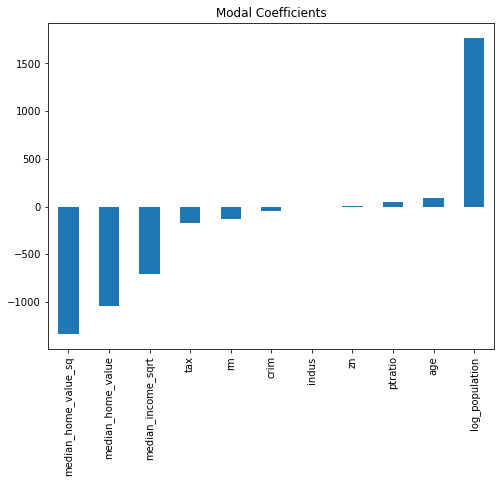

In [47]:
# lasso coefficient plot
coef = pd.Series(LassoReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

## Random Forest
[Back to top](#Machine-Learning-with-Regression-in-Python)  

**Section Goals**
1. Tune two hyperparameters using 5-fold cross validation
1. Train a random forest regression using optimal hyperparameter values
2. Make predctions on test dataset
3. Calculate root mean square error and R-squared
4. Create visualizations of predictions and residuals
5. Create feature importance graphs
6. Write out tree visualizations to png files

In [48]:
# grid search with 5-fold cross validation

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor()
parameters = {'max_depth':[3,5,10],'n_estimators':[100,500,1000],}
rf = GridSearchCV(reg, parameters, cv=5)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [49]:
print(rf.best_estimator_)
print(rf.best_score_)
print(rf.best_params_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
0.732558957230429
{'max_depth': 10, 'n_estimators': 500}


In [50]:
# make predictions on our test dataset
pred = rf.predict(X_test)

In [51]:
# calculate an accuracy metric and an error metric
test_set_rsq = rf.score(X_test,y_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test,pred)))

print('Test Set RSQ value with Random Forest:',test_set_rsq)
print('Test Set RMSE with Random Forest:',test_set_rmse)
print('Actual Dep Var Standard Dev:',y_test['sales'].std())

Test Set RSQ value with Random Forest: 0.7356761484988797
Test Set RMSE with Random Forest: 2179.520899454486
Actual Dep Var Standard Dev: 4240.428686608282


In [52]:
# store results to view later
add_new_model_metrics('Random Forest',test_set_rsq,test_set_rmse)

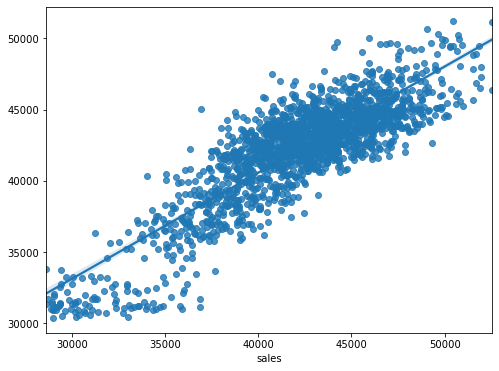

In [53]:
# how well do our predictions look against the actual values?
sns.regplot(x=y_test['sales'],y=pred)

Text(0.5, 1.0, 'Residual plot')

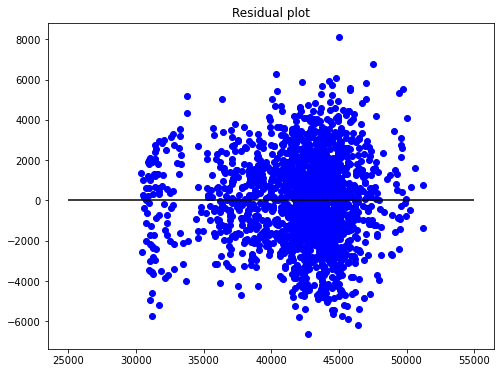

In [54]:
# residual plot - how randomly dispersed are our errors?
x_plot = plt.scatter(pred, (pred - y_test['sales']), c='b')
plt.hlines(y=0, xmin=xmin, xmax=xmax)
plt.title('Residual plot')

Text(0.5, 1.0, 'Variable Importances')

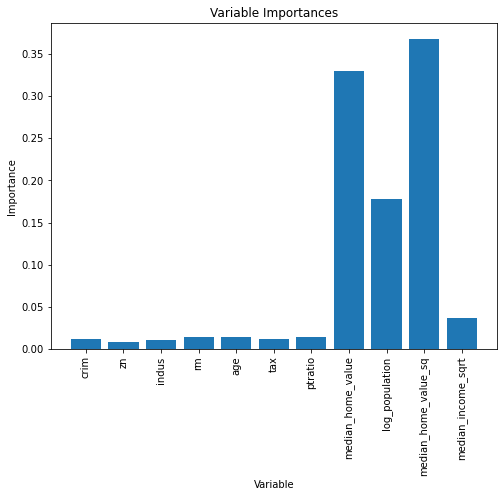

In [55]:
# feature importance
rf = RandomForestRegressor(max_depth = 10, n_estimators = 1000)
rf.fit(X_train,y_train)
x_values = list(range(len(rf.feature_importances_)))
plt.bar(x_values, rf.feature_importances_, orientation = 'vertical')
plt.xticks(x_values, predictors, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

In [56]:
# big tree visualizations
import pydot
from sklearn.tree import export_graphviz

tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'rf_tree.dot', feature_names = X.columns.to_list(), rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('rf_tree.dot')
graph.write_png('rf_tree.png')

In [57]:
# small tree visualizations
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = 'rf_small_tree.dot', feature_names = X.columns.to_list(), rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('rf_small_tree.dot')
graph.write_png('rf_small_tree.png')

## Boosted Trees
[Back to top](#Machine-Learning-with-Regression-in-Python)  

**Section Goals**
1. Tune two hyperparameters using 3-fold cross validation
1. Train a Gradient Boosted Tree regression using an optimal hyperparameter value
2. Make predctions on test dataset
3. Calculate root mean square error and R-squared
4. Create visualizations of predictions and residuals
5. Create feature importance graphs
6. Write out tree visualizations to png files

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

In [59]:
# loop through 4 max_depth values
metrics = {}
for i in tqdm.tqdm((2,3,5)):
    gr = GradientBoostingRegressor(n_estimators = 2000
                        ,max_depth = i
                        ,learning_rate = 0.01
                        ,random_state=20)
    rsq = cross_val_score(gr,X_train,y_train,cv=3)
    metrics[i] = rsq.mean()

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [04:03<00:00, 81.13s/it]


In [60]:
# view optimal max_depth
optimal_max_depth = max(metrics, key=metrics.get)
print(optimal_max_depth)

2


In [61]:
# specify model with optimal hyperparameters
gr = GradientBoostingRegressor(n_estimators = 2000
                        ,max_depth = optimal_max_depth
                        ,learning_rate = 0.01
                        ,random_state=20)

In [62]:
# train the model
gr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=20, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
# make predictions on our test dataset
pred = gr.predict(X_test)

In [64]:
# calculate an accuracy metric and an error metric
test_set_rsq = gr.score(X_test,y_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test,pred)))

print('Test Set RSQ value with Gradient Boosted Trees:',test_set_rsq)
print('Test Set RSME with Gradient Boosted Trees:',test_set_rmse)
print('Actual Dep Var Standard Dev:',y_test['sales'].std())

Test Set RSQ value with Gradient Boosted Trees: 0.7354896480341584
Test Set RSME with Gradient Boosted Trees: 2180.2896722737128
Actual Dep Var Standard Dev: 4240.428686608282


In [65]:
# store results to view later
add_new_model_metrics('Gradient Boost',test_set_rsq,test_set_rmse)

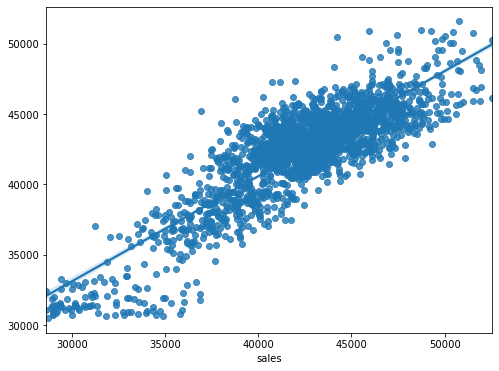

In [66]:
# how well do our predictions look against the actual values?
sns.regplot(x=y_test['sales'],y=pred)

Text(0.5, 1.0, 'Residual plot')

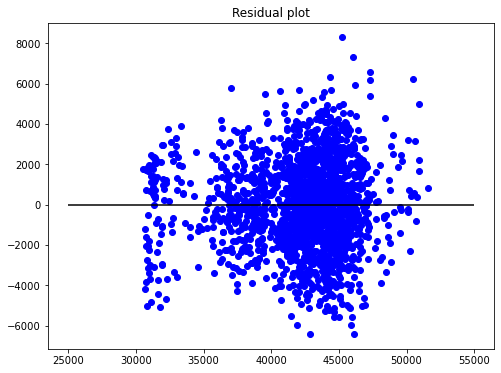

In [67]:
# residual plot - how randomly dispersed are our errors?
x_plot = plt.scatter(pred, (pred - y_test['sales']), c='b')
plt.hlines(y=0, xmin=xmin, xmax=xmax)
plt.title('Residual plot')

Text(0.5, 1.0, 'Variable Importances')

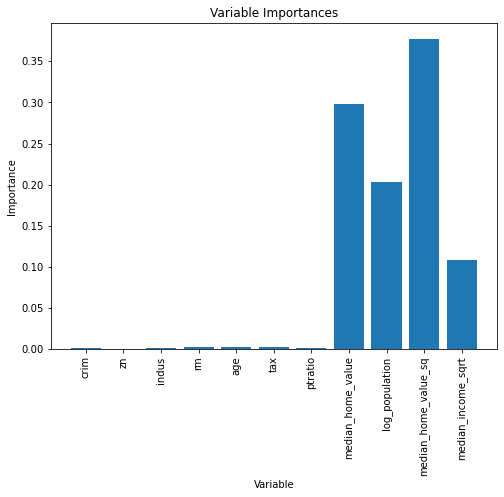

In [68]:
# feature importance
plt.bar(x_values, gr.feature_importances_, orientation = 'vertical')
plt.xticks(x_values, predictors, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

In [69]:
# write out tree visualizations
tree = gr.estimators_[5, 0]
export_graphviz(tree, out_file = 'boosted_tree.dot', feature_names = X.columns.to_list(), rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('boosted_tree.dot')
graph.write_png('boosted_tree.png')

## Neural Network
[Back to top](#Machine-Learning-with-Regression-in-Python)  

**Section Goals**
1. Train a Multi-layer Perceptron regressor
2. Make predctions on test dataset
3. Calculate root mean square error and R-squared
4. Create visualizations of predictions and residuals
5. Visualize permutation feature importance with eli5

In [70]:
from sklearn.neural_network import MLPRegressor

# specify model without any tuning, just best guess on how to specify it
# given more time, resources, and data, we might want to spend more time optimizing this model
nn = MLPRegressor(
    activation = 'relu', # linear functional form since we already accounted for non-linearities
    hidden_layer_sizes = (10,100,),
    solver = 'lbfgs', # this solver works well on small datasets (a big dataset means 10s or 100s of thousands of observations)
    alpha = .001,
    random_state = 20,
    early_stopping = False
)

In [71]:
# train model
nn.fit(X_train, y_train)

C:\Users\uger7\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 100), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=20, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [72]:
# make predictions
pred = nn.predict(X_test)

In [73]:
# calculate an accuracy metric and an error metric
test_set_rsq = nn.score(X_test,y_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test,pred)))

print('Test Set RSQ value with Neural Network:',test_set_rsq)
print('Test Set RMSE with Neural Network:',test_set_rmse)
print('Actual Dep Var Standard Dev:',y_test['sales'].std())

Test Set RSQ value with Neural Network: 0.742529813809667
Test Set RMSE with Neural Network: 2151.0788710567617
Actual Dep Var Standard Dev: 4240.428686608282


In [74]:
# store results to view later
add_new_model_metrics('Neural Network',test_set_rsq,test_set_rmse)

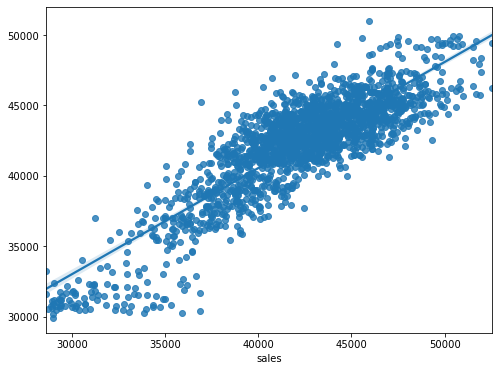

In [75]:
# how well do our predictions look against the actual values?
sns.regplot(x=y_test['sales'],y=pred)

Text(0.5, 1.0, 'Residual plot')

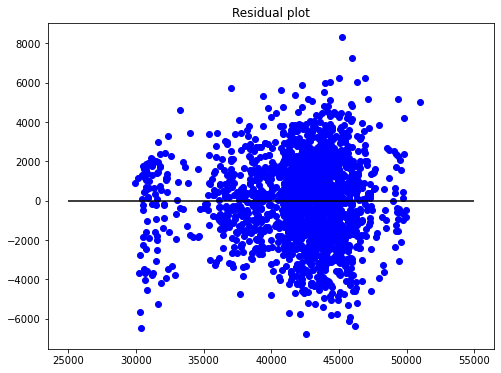

In [76]:
# residual plot - how randomly dispersed are our errors?
x_plot = plt.scatter(pred, (pred - y_test['sales']), c='b')
plt.hlines(y=0, xmin=xmin, xmax=xmax)
plt.title('Residual plot')

In [77]:
# permutation feature importance 
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC

# load data, define score function
perm = PermutationImportance(nn).fit(X_test, y_test)
weights = eli5.show_weights(perm)
weights.data = weights.data.replace('background-color:','color:black; background-color:') # if you aren't on dark theme, comment out this line
weights

C:\Users\uger7\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\uger7\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
1.4723 ± 0.0782,x9
0.3483 ± 0.0282,x8
0.1725 ± 0.0120,x7
0.0671 ± 0.0076,x10
0.0064 ± 0.0016,x4
0.0038 ± 0.0036,x2
0.0021 ± 0.0010,x6
0.0018 ± 0.0016,x0
0.0015 ± 0.0009,x1
0.0007 ± 0.0020,x5


How to read variable importances:
- The green variables are the most important
- White are not important
- Red means the variable actually hurts the model (not seen here)
- In this case, the most important variable is number 9 (median_home_value_sq), followed by 8 (log_population), 7 (median_home_value), and 10 (median_income_sqrt)
- The documentation on permutation feature importance is worth looking into: [https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html#eli5-permutation-importance](https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html#eli5-permutation-importance)

## Make Final Predictions
[Back to top](#Machine-Learning-with-Regression-in-Python)  

**Section Goals**
1. Determine which model performed the best on the test dataset
2. Read in the new dataset with unknown sales information and process through previously created pipeline
3. Train the best-performing model on the entire dataset where we have known sales information
4. Make predictions on the new dataset
5. Use predictions to make recommendations about which counties to expand the business to next

In [78]:
# view final results from all models
all_model_accuracy_error_metrics

,model,rsq,rmse
0,Linear,0.7288,2207.51
1,Ridge,0.7289,2207.41
2,Lasso,0.7294,2205.38
3,Random Forest,0.7357,2179.52
4,Gradient Boost,0.7355,2180.29
5,Neural Network,0.7425,2151.08


In [79]:
# read in new dataset of unkonwn data
new_data = pd.read_csv('new.csv')

In [80]:
# send new data through pipeline
new_data_processed = pipe(new_data)

In [81]:
# normalize data since we did that when training our models
scaler.fit(new_data_processed)
new_data_processed = scaler.transform(new_data_processed)

scaler.fit(X)
X = scaler.transform(X)

In [82]:
# this is the data we will use to train our final model
X.shape

(7432, 11)

In [83]:
# this is the data we will be predicting on - should have the same number of columns (11 each)
new_data_processed.shape

(21770, 11)

In [84]:
# train model and make best predictions
nn.fit(X,y)
pred_final = nn.predict(new_data_processed)
new_data['predicted_sales'] = pred_final

C:\Users\uger7\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Make Sure the Distribution Looks about Right

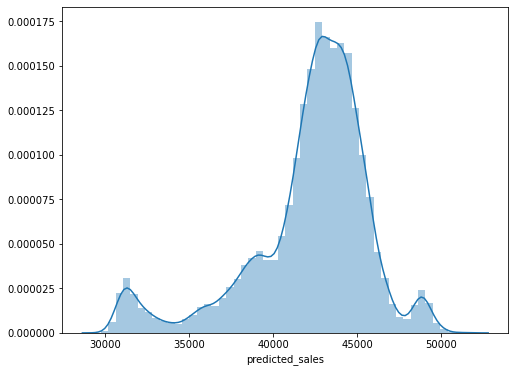

In [85]:
sns.distplot(new_data['predicted_sales'])

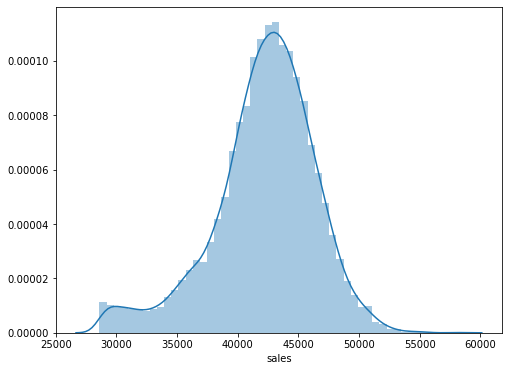

In [86]:
sns.distplot(y['sales'])

The predicted sales are more jaggedy than the observed sales. But the distributions bascially look the same, and this is a good sanity check on our process. What makes the neural network outclass the other methods in this example is it can account for the peak at the left tail of the actual sales distribution. A linear model will have trouble to get those values correct since the actual distribution changes as sales values are smaller and the linear model assumes a more continuous distribution.

## Print Top 10 Recommended Counties

In [87]:
# total predicted sales per county
new_data.sort_values('predicted_sales',ascending=False)[['county_id','predicted_sales']].head(10)

,county_id,predicted_sales
11777,525,51691.742419
18245,431,51338.297476
252,3631,51142.966768
5155,5980,51087.470313
13009,1179,50707.056706
13904,3778,50594.304266
13491,22701,50450.932036
13010,12208,50315.980167
19297,7132,50240.714086
19617,515,50230.382424


In [88]:
# total predicted sales per capita
new_data['predicted_sales_per_cap'] = new_data['predicted_sales']/new_data['population']
new_data.sort_values('predicted_sales_per_cap',ascending=False)[['county_id','predicted_sales_per_cap','predicted_sales']].head(10)

,county_id,predicted_sales_per_cap,predicted_sales
2745,528,411.241783,40712.936548
13076,520,398.276229,39429.346656
7181,482,388.811946,41214.066231
17656,410,386.973412,39471.287984
469,124,381.121057,40779.953097
9046,437,379.218421,39817.934155
1438,549,377.157162,39978.659197
6619,271,376.731873,38426.651011
21480,153,375.674023,37567.402266
20891,461,370.165551,38497.217269


To expand this analysis further, we can look into [Lime](https://github.com/marcotcr/lime) and [Partial Dependence Plotting](https://christophm.github.io/interpretable-ml-book/pdp.html).